The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# Chapter 3. 넘파이$^{NumPy}$ 튜토리얼(2/3)

## 학습 목표
    - 기계학습에서 왜 넘파이를 사용하는지 이해한다
    - 넘파이 개념과 기본적인 사용법을 익힌다.

## 학습 내용
1. 배열의 형상 다루기 
2. 배열들 합치기 
3. 배열의 인덱싱과 슬라이싱
4. 배열과 벡터의 연산

## 1. 배열의 형상(크기) 다루기

기존의 만들어진 배열의 내부 데이터는 보존한 채로 형상만 바꿀 수 있는 다양한 함수 혹은 메소드가 있습니다. 

- reshape
- flatten
- ravel
- newaxis

#### Example 1.  2차원 이상의 행렬을 만들 때, 때때로 `-1`를 사용하여, Python으로 하여금 크기를 계산하도록 합니다. 

- 사용하는 원소의 갯수가 정해저 있기 때문에 `reshape()` 메소드의 형상 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있습니다. -1을 넣으면 해당 숫자는 메소드 자체에서 자동으로 계산해서 처리합니다.

#### 3 x ?

In [5]:
import numpy as np
a = np.arange(12)
c = a.reshape(3, -1)
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### ? x 3 x 2

In [12]:
e = a.reshape(-1, 3, 2)
print(a)
print(e)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


#### Example 2. 다차원 배열을 1차원으로 전환하십시오. 

- 다차원 배열을 1차원으로 전환하기 위해서 flatten 메소드 혹은 ravel 함수를 사용합니다.
- `flatten()` always returns a copy.
- `ravel()` returns a view of the original array whenever possible. 

```
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
  
  [ 0  1  2  3  4  5  6  7  8  9 10 11]
```

In [13]:
f = e.flatten()
print(e)
print(f)
f[0] = 99
print(e)
print(f)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[99  1  2  3  4  5  6  7  8  9 10 11]


In [14]:
f = e.ravel()
f[0] = 99
print(e)
print(f)

[[[99  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[99  1  2  3  4  5  6  7  8  9 10 11]


#### 배열 사용에서 주의할 점

- 길이가 5인 1차원 배열과 행, (5,)
- 행렬의 형상이 (5, 1)인 2차원 배열 또는 행, 
- 행렬의 형상이 (1, 5)인 2차원 배열은 데이터가 같아도 엄연히 다른 종류의 객체입니다.

```
[0 1 2 3 4]

[[0]
 [1]
 [2]
 [3]
 [4]]
 
 [[0 1 2 3 4]]
```

#### Example 3. 다음과 같은 1차원 배열(5,)을 2차원 배열(1, 5)로 만드십시오.  
```
[0 1 2 3 4]

[[0 1 2 3 4]]
```

In [15]:
x = np.arange(5)
y = x.reshape(1, 5)     # method 1 using reshape()
z = x[np.newaxis, :]     # method 2 using np.newaxis    (5,) --> (1, 5)
print(x)
print(y)
print(z)

[0 1 2 3 4]
[[0 1 2 3 4]]
[[0 1 2 3 4]]


#### Example 4. 다음과 같은 1차원 배열(5,)을 2차원 배열(5, 1)로 만드십시오.   

In [17]:
x = np.arange(5)
y = x.reshape(5, 1)     # method 1 using reshape()
z = x[:, np.newaxis]      # method 2 using np.newaxis  (5,) --> (5, 1)
print(x)
print(y)
print(z)

[0 1 2 3 4]
[[0]
 [1]
 [2]
 [3]
 [4]]
[[0]
 [1]
 [2]
 [3]
 [4]]


## 2. 배열들 합치기  
행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용합니다.

1. hstack
1. vstack
1. concatenate

#### Example 1. hstack

`hstack` 함수는 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만듭니다. 연결할 배열은 하나의 리스트에 담아야 합니다. 

```
[[1. 1.]
 [1. 1.]
 [1. 1.]]
 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]]
```

In [18]:
a = np.ones((3, 2))
b = np.zeros((3, 3))
print(a)
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [19]:
c = np.hstack([a, b])
print(c)

[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]]


#### Example 2. vstack

`vstack` 함수는 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만듭니다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 합니다.

```
[[1. 1. 1.]
 [1. 1. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
 
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
```

In [20]:
a = np.ones((2, 3))
b = np.zeros((3, 3))
print(a)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [21]:
c = np.vstack([a, b])
print(c)

[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


#### 3. concatenate 
두 배열이 같은 차원일 때 사용합니다. 예시를 통해서 살펴보면, 직감적으로 알 수 있습니다. 

입력 배열
```
[[1 2]
 [3 4]]
[[ 5  6]
 [ 7  8]
 [ 9 10]]
```
출력 배열들
```
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
 ```
 ```
[[ 1  2  5  7  9]
 [ 3  4  6  8 10]]
 ```
 ```
[ 1  2  3  4  5  6  7  8  9 10]
```

In [22]:
a = np.array([[1, 2], [3, 4]])               # 2x2
b = np.array([[5, 6], [7, 8], [9, 10]])      # 3x2
print(a)
print(b)

[[1 2]
 [3 4]]
[[ 5  6]
 [ 7  8]
 [ 9 10]]


In [23]:
print(np.concatenate((a, b), axis = 0))       # default
print(np.concatenate((a, b.T), axis = 1))
print(np.concatenate((a, b), axis = None))    # flatten

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[ 1  2  5  7  9]
 [ 3  4  6  8 10]]
[ 1  2  3  4  5  6  7  8  9 10]


## 3. 배열의 인덱싱과 슬라이싱

기계학습을 하면서, 다차원 배열을 부분적으로 다루어야 할 때가 많습니다. 인덱싱과 슬라이싱이 필요한 것입니다. 
배열의 인덱싱은 0부터 시작하고, 또한 음수 인덱싱도 가능하여 배열의 끝은 -1부터 시작합니다. 또한 범위를 지정할 때, 콜론(:)을 사용합니다. 

#### 행, 열 인덱싱
행의 인덱싱은 행의 인덱스로만 가능하지만, 열을 인덱싱할 때는 행의 위치에 콜론(:)을 지정해야 합니다.  
콜론(:)을 사용하여 start:end와 같이 범위를 지정할 때, end는 자신을 포함하지 않고, start가 생략이 되면 0부터를 의미하며, end가 생략되면 끝까지를 의미합니다. 


#### 원소 인덱싱
원소 하나씩 접근하는 것은 일반적인 배열 인덱싱과 같습니다. 다만, 파이썬의 특이한 점은 인덱싱으로 음수를 사용하며, -1은 배열의 끝을 나타냅니다. 그러므로, 아래 그림과 같은 배열에서 원소 12의 인덱싱은 `[-1, -1]`이며, 이런 인덱싱은 2차원 배열의 크기가 바뀔지라도 항상 마지막 원소를 가리키는 편리함이 있습니다.

예를 들어, 
- `[:, :]` 2차원 배열의 모든 행과 열을 나타내고, 
- `[:2]`는 배열의 0, 1의 행, 
- `[:, 1:3]`은 1, 2열을 나타냅니다. 
- `[-1, -1]`은 원소 12를 나타냅니다.

일반적으로 파이썬에서 범위(인덱싱)를 지정할 때 범위의 끝은 포함하지 않습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray-indexing.png?raw=true" width="600">
<center>그림 1: 넘파이 배열 인덱싱</center>

#### Example 1: 아래와 같은 배열을 생성하고,  첫째 행과 열을 출력하십시오. 
```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
```

첫 행과 열은 다음과 같습니다. 
```
[1 2 3 4]
[1 5 9]
```

In [24]:
a = np.arange(1, 13).reshape(3, 4)
print(a)
print(a[0])              # 첫 행
print(a[:, 0])           # 첫 열

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[1 2 3 4]
[1 5 9]


#### Example 2:  다음과 같이 마지막 행과 열을 출력하십시오. 
```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
```
마지막 행과 열
```
[ 9 10 11 12]
[ 4  8 12]
```

In [25]:
print(a[2])         # 마지막 행
print(a[:, 3])      # 마지막 열

[ 9 10 11 12]
[ 4  8 12]


In [26]:
print(a[-1])
print(a[:, -1])

[ 9 10 11 12]
[ 4  8 12]


#### 행이나 열을 슬라이싱하기
두 가지 방법이 있습니다. 하나는 1차원 배열로 하는 방법 또 하나는 2차원 배열로 슬라이싱하는 방법입니다. 

1. 두 번째 행(`[5 6 7 8]`)을 슬라이싱할 때 (4,) 혹은 (1, 4) 형상으로 슬라이싱하는 방법이 있습니다. 
2. 두 번째 열(`[2 6 10]`)을 슬라이싱할 때도, (3,) 혹은 (3, 1) 형상으로 슬라이싱하는 방법이 있습니다. 

```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
 ```

#### Example 3. 두번째 행과 열을 각각 1차원으로 추출하십시오.

```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
```
```
[5 6 7 8]
[ 2  6 10]
```
#### solution

In [27]:
a = np.arange(1, 13).reshape(3,4)
row = a[1]         # 두번째 행
col = a[:, 1]      # 두번째 열
print(row)
print(col)

[5 6 7 8]
[ 2  6 10]


#### Example 4. 두번째 행과 열을 각각 2차원으로 추출하십시오.

```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
```
```
[[5 6 7 8]]
[[ 2]
 [ 6]
 [10]]
```
#### solution

In [28]:
row = a[1:2]         # 두번째 행
col = a[:, 1:2]      # 두번째 열
print(row)
print(col)

[[5 6 7 8]]
[[ 2]
 [ 6]
 [10]]


### 3.2 서브(sub)배열은 기존 배열의 뷰(view)이다. 

제목이 무슨 말인지 이해가 가지 않지만 그대로 진행해 봅시다. 여기서 기존의 배열은 예를 들면 `org` 배열이라고 합시다.

- 서브 배열 `sub`의 첫 원소를 값을 `99`으로 바꾸고 `sub`를 출력하고, 기존의 배열 `org`를 출력해봅시다. 
- 그러면, `org` 배열도 수정된 것을 볼 수 있습니다. 유의해야 할 점입니다. 이러한 사실을 간과하면, 언제가 몇 시간이나 며칠 동안 디버깅을 해야 할지도 모릅니다. 

In [29]:
org = np.arange(1, 13).reshape(3,4)
print(org)
sub = org[:2,:2]         # upper left corner 2x2
print(sub)
sub[0, 0] = 99           # sub[0, 0] = 99
print(org)
print(sub)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[1 2]
 [5 6]]
[[99  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[99  2]
 [ 5  6]]


org 배열에서 일부 잘라낸 sub 배열을 서브배열$^{subarray}$라고 부르는 이유가 여기에 있습니다. 

view(뷰)라는 말은 무슨 말인가요? C프로그래밍의 포인터 개념입니다. 포인터가 가리키고 있는 내용을 바꾸면 원래의 저장된 변수의 내용이 바뀌는 것과 같습니다. 

### 3.3 배열의 복사

배열을 복사할 때도 조심해야 합니다. 다음과 같이 `cpy = org`를 하여 `org`를 복사했다고 생각하면 잘못입니다. 여기서 `cpy`도 역시 view(뷰)입니다. 

In [30]:
org = np.arange(1, 13).reshape(3,4)
cpy = org
cpy[0, 0] = 999
print(org)

[[999   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


그러면, 배열의 복사는 어떻게 해야 합니까? 배열 ndarray클래스가 제공하는 `copy()`메소드를 사용해야 합니다. 

In [31]:
org = np.arange(1, 13).reshape(3,4)
cpy = org.copy()
cpy[0, 0] = 999
print(org)
print(cpy)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[999   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


### 3.5 불린$^{Boolean}$ 배열과 Arg 함수 다루기

기계학습에서 종종 사용되는 인덱싱입니다. 어떤 조건을 만족하는 배열의 원소를 선택할 때 사용합니다. 분류를 한 결과가 배열로 저장되어 있을 때, 어떤 임계값보다 큰 모든 원소의 갯수나 인덱스를 구할 수 있습니다.  

- `argmax(), argmin()`: 배열의 값들 중에서 가장 크거나 혹은 작은 값을 가진 원소의 인덱스를 반환합니다. 
- `argwhere()`: 배열의 값들 중에서 0가 아닌 원소들의 인덱스를 반환합니다. 

#### Example 1: 

아래와 같이 True 혹은 False를 무작위로 설정한 배열(size = 10) `data`를 생성하십시오.

```
[False  True  True  True False False  True False False False]
```

In [32]:
data = np.random.random(12).reshape(3,4)  # np.random.random(12).reshape(3,4)
print(data)
data = data > 0.5
print(data)

[[0.85697856 0.63015058 0.98374751 0.37685346]
 [0.34193857 0.99159785 0.02944214 0.99260957]
 [0.13724661 0.14571436 0.28817962 0.19392074]]
[[ True  True  True False]
 [False  True False  True]
 [False False False False]]


#### Example 2: 

아래와 같이 무작위로 설정된 배열에서  `True`의 갯수를 계산하십시오.
```
[False  True  True  True False False  True False False False]
4
```

In [33]:
print(data)
print(sum(data))

[[ True  True  True False]
 [False  True False  True]
 [False False False False]]
[1 2 1 1]


#### Example 3: np.argmax()

아래와 같이 난수로 이루어진 배열에서 가장 큰 수의 인덱스를 찾으십시오. 

```
[0.34467622 0.64589714 0.88837541 0.90331364 0.81690392 0.64632381
 0.65675037 0.27906638 0.39276939 0.6985122 ]
3
```

In [36]:
data = np.random.random(10)  # np.random.random(12).reshape(3,4)
print(data)
print(np.argmax(data))

[0.15539023 0.57734402 0.21302489 0.10307477 0.37083416 0.47286129
 0.99901111 0.04031    0.43316239 0.56512434]
6


#### Example 4: argwhere()

아래와 같이 무작위로 설정된 배열에서  `True` 원소가 있는 인덱스로 구성된 리스트를 생성하십시오. 
```
[ True False False False  True False False False  True  True]
[[0]
 [4]
 [8]
 [9]]
[0 4 8 9]
```

In [40]:
data = np.random.random(10)  # np.random.random(12).reshape(3,4)
data = data > 0.5
print(data)
index = np.argwhere(data)
print(index)
print(index.flatten())

[False  True False  True False False False  True False  True]
[[1]
 [3]
 [7]
 [9]]
[1 3 7 9]


## 4. 배열과 벡터의 연산

행렬은 여러 벡터로 구성된 데이터 셋입니다. 하나의 벡터 안에는 원소의 값이 같은 형식(type)이며, 이러한 벡터를 여러 개 모은 것이 행렬입니다. 원소가 3개인 벡터가 2개 있으면 2행, 3열의 행렬, 2x3 행렬입니다.  

### 4.1 원소별 사칙 연산

$ \left\lgroup \matrix{1 & 2\cr 3 & 4} \right\rgroup 
+ \left\lgroup \matrix{5 & 6\cr 7 & 8} \right\rgroup
= \left\lgroup \matrix{1+5 & 2+6\cr 3+7 & 4+8} \right\rgroup $

In [41]:
import numpy as np

A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])

In [42]:
print(A + B)

[[ 6  8]
 [10 12]]


In [43]:
print(A - B)

[[-4 -4]
 [-4 -4]]


In [44]:
print(A * B)

[[ 5 12]
 [21 32]]


In [45]:
print(A / B)

[[0.2        0.33333333]
 [0.42857143 0.5       ]]


### 4.2 행 벡터와 열 벡터

선형 대수학에서, 행 벡터는 행 행렬 1xm 행렬, 즉 m 원소들로 구성된 단일 행 행렬이며 다음과 같이 나타낼 수 있습니다.
\begin{align} \mathbf{w} = \begin{pmatrix} w_1 \ w_2 \ \cdots \ w_m \end{pmatrix} \end{align}

마찬가지로, 열 벡터는 열 행렬 mx1 행렬, 즉 m 원소들의 구성된 단일 열 행렬이며 다음과 같이 표시합니다. 
\begin{align} \mathbf{x} = \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix} \end{align}


행 벡터의 전치 행렬은 열 벡터이며, 열 벡터의 전치$^{transpose}$ 행렬은 행 벡터입니다. 

\begin{align} \begin{pmatrix} x_1 \ x_2 \ \cdots \ x_m \end{pmatrix}^T 
            = \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}, \qquad 
            \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}^T
            = \begin{pmatrix} x_1 \ x_2 \ \cdots \ x_m \end{pmatrix} \end{align}

### 4.3 점곱(혹은 내적, inner product)

#### 행 벡터와 열 벡터의 점곱
행 벡터 $\mathbf{w}$와 열 벡터 $\mathbf{x}$를 각각 원소별로 곱한 것을 합산함으로 내적(inner product, 혹은 점곱)을 구할 수 있습니다.    

\begin{align} 
\mathbf{w \cdot x} &= \begin{pmatrix} w_1 \ w_2 \ \cdots \ w_m \end{pmatrix} \cdot 
                     \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}  \\
                   &= \sum_{i=1}^{m} w_ix_i \\
                   &= w_1x_1 + w_2x_2 + \cdots + w_m x_m
\end{align}



#### 열 벡터와 행 벡터의 점곱

만약, 우리가 열(col) 벡터 `x`와 행(row) 벡터 `w`의 내적을 하면 어떻게 될까요?  
\begin{align} 
\mathbf{x \cdot w} &= \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}
                      \cdot \begin{pmatrix} w_1 \ w_2 \ \cdots \ w_m \end{pmatrix} 
                   = \begin{pmatrix} x_1w_1 & x_1w_2 & \cdots & x_1w_m \cr
                                     x_2w_1 & x_2w_2 & \cdots & x_2w_m \cr
                                     ... &  &  \cdots & \cdots \cr 
                                     x_mw_1 & x_mw_2 & \cdots & x_mw_m \end{pmatrix}
\end{align}


#### 넘파이 벡터의 형상

벡터를 1차원 배열로 쉽게 나타낼 수도 있겠지만, 만약 그렇게 한다면, 행(row)과 열(col)의 점곱은 스칼라 값을 얻을 수 있지만, 열(col)과 행(row) 벡터의 점곱은 얻을 수 없습니다. 행/열의 점곱과 열/행의 점곱을 온전히 계산하려면, __벡터__를 1차원 배열이 아니라, __2차원 배열__을 사용하여 $\mathbf{w}$를 `1 x m`형상으로, $\mathbf{x}$를 `m x 1` 형상으로 생성해야 합니다. 


그러면, 어떻게 하면,$\mathbf{w}$, $\mathbf{x}$를 __진정한__ 열 벡터와 행 벡터로 생성할 수 있을까요?

`reshape()`를 사용하여, 원하는 shape을 지정하거나 벡터를 생성할 때 __겹`[]`__을 사용하여 2차원 배열로 만들어야 합니다. 다음과 같이 말입니다. 

`row_vector = np.array([[0, 1, 2, 3]])`
`col_vector = np.array([[4, 3, 2, 1]])`

In [46]:
w = np.array(np.arange(4)).reshape(1, 4)
x = np.array(np.arange(4, 0, -1)).reshape(4, 1)
print(w)
print(x)

[[0 1 2 3]]
[[4]
 [3]
 [2]
 [1]]


In [47]:
np.dot(w, x)    # 행/렬의 점곱

array([[10]])

In [48]:
np.dot(x, w)    # 렬/행의 점곱

array([[ 0,  4,  8, 12],
       [ 0,  3,  6,  9],
       [ 0,  2,  4,  6],
       [ 0,  1,  2,  3]])

결론적으로, __벡터는 2차원 배열__입니다. 2차원 배열에서 행(row)이나 열(col)만 있는 배열입니다. 
2차원 배열로 벡터를 표시하면 __전치(transpose)__도 작동합니다. 

In [49]:
print(w.T)
print(x.T)

[[0]
 [1]
 [2]
 [3]]
[[4 3 2 1]]


### NOTE: 1차원 배열은 벡터가 아니지만, 점곱이 가능합니다.
그런데, 만약, 우리가 두 개의 1차원 배열 `w = [0 1 2 3] x = [4 3 2 1]`를 점곱하면 스칼라 10을 얻습니다. w, x 두 벡터가 모두 똑같이 shape이 (4,)이며, 서로 구별할 수 없으며, `np.dot(w, x)`와 `np.dot(x, w)`는 같은 결과를 도출합니다. 결론적으로, w, x는 벡터가 아니고 1차원 배열입니다. 

In [50]:
import numpy as np
w = np.array(np.arange(0, 4))         # w = [0 1 2 3]
x = np.array(np.arange(4, 0, -1))     # x = [4 3 2 1]  
print(w)
print(x)
print(np.dot(w, x))

[0 1 2 3]
[4 3 2 1]
10


In [51]:
np.dot(x, w)

10

 두 배열의 내적 결과는 나왔지만, 사실 행 벡터와 열 벡터의 점곱(dot product)를 한 것은 아닙니다. 왜냐하면, w, x는 1차원 배열이지 사실상 벡터는 아닙니다. 그 형상을 살펴보면, 모두 __똑같이 형상이 (4,)이기 때문입니다__. 

### 4.3 행렬의 내적

NumPy ndarray 클래스의 `dot` 메소드를 사용해서 행렬의 내적을 구할 수 있습니다.

$ \left\lgroup \matrix{1 & 2\cr 3 & 4} \right\rgroup  \bullet
  \left\lgroup \matrix{5 & 6\cr 7 & 8} \right\rgroup  =
  \left\lgroup \matrix{1\times5+2\times7 & 1\times6+2\times8\cr 3\times5+4\times7 & 3\times6+4\times8} \right\rgroup
$

In [52]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]


In [53]:
print(A.dot(B))

[[19 22]
 [43 50]]


### 4.4 행렬의 전치$^{transpose}$

기계학습 코딩을 하다보면, 종종 배열의 모양을 바꾸어야 할 할 때가 있습니다. 전치는 행렬 내의 원소를 왼쪽 위에서 오른쪽 아래를 가로지르는 대각선을 기준으로 서로 위치를 바꾼 것입니다.  다른 말로, 행과 열의 인덱스를 바꾸는 것을 __전치$^{transpose}$__라고 합니다. 넘파이에서 행렬을 전치하기 위해선, 간단하게 배열 객체의 ‘T’ 속성을 사용하면 됩니다:

다음의 동영상 파일을 보면 이해에 도움이 될 것입니다. 
<img src = "https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/Matrix_transpose.gif?raw=true" width = "100">
<center> 그림 3: 행렬의 전치(출처:https://en.wikipedia.org/wiki/Transpose)  </center>

다음과 같이 두 행렬 A 와 B 가 있다고 합시다.

$ A = \left\lgroup \matrix{1 & 2 & 3\cr 4 & 5 & 6} \right\rgroup, \quad
B = \lgroup \matrix{1 & 2 & 3} \rgroup
$

위의 두 행렬을 넘파이 배열로 표현하면 다음과 같습니다. `array` 메소드의 인자로 1차원 파이썬 리스트를 넣으면, 크기가 리스트의 길이와 같은 벡터가 생성됩니다. 넘파이 배열의 형상을 확인하려면 `shape` 메소드를 사용하면 됩니다. 

여기서 A, B의 rank는 각각 2, 1 입니다. rank가 1인 배열은 전치를 해도 아무런 변화가 없습니다. 

먼저, 두 행렬을 넘파이 배열로 만들고 각각의 shape(형상)을 출력해봅시다.  

In [54]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([1,2,3])        # 벡터가 아님. 
print(A.shape, B.shape)

(2, 3) (3,)


두 배열의 형상이 각각 (2,3), (3,) 배열인데, 서로 곱셈이 가능한지 코드로 시도해 봅시다

In [55]:
C = np.dot(A, B)           # 벡터가 아닌 1차원의 값으로 반환
print(C)

[14 32]


1차원 배열 형상(2,)의 결과를 얻었습니다. 

만약에, 우리가 수학의 행렬의 내적처럼 두 행렬 (2 x 3), (3 x 1)을 내적하여 2차원 행렬(2, 1)을 구하길 원한다면 어떻게 해야 할까요? 

$ A \bullet B^T = \begin{pmatrix}  1 & 2 & 3\cr 4 & 5 & 6 \end{pmatrix}
\bullet \begin{pmatrix} 1 \cr 2 \cr3 \end{pmatrix} 
= \begin{pmatrix}1\times1+2\times2+3\times3 \cr 4\times1+5\times2+6\times3 \end{pmatrix} 
= \begin{pmatrix} 14 \cr 32 \end{pmatrix} 
$
  

우리가 수학적인 `reshape` 메소드를 사용해서 __벡터__를 행렬로 만들어줄 수 있습니다. `reshape(1,3)` 는 넘파이 배열을 크기 1 x 3 의 행렬로 형태를 바꾸겠다는 의미입니다. 결과도 __벡터__로 산출됩니다. 

In [56]:
A = np.array([[1,2,3],[4,5,6]])        # rank 2, shape (2, 3)
B = np.array([1,2,3]).reshape(1,3)     # rank 2, shape (1, 3)
C = np.dot(A, B.T)                     # (2x3)(3x1) ==> (2x1)
print(C)

[[14]
 [32]]


##  Exercise 

#### 1. 다음과 같이 3x4 배열을 만들고, np.newaxis를 이용하여 axis 0 를 추가 하여 (1, 3, 4) 형상의 배열과 axis 2를 추가하여 (3, 1, 4) 형상의 배열을 생성하십시오. 

2차원 배열 형상(3, 4)
```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
```

3차원 배열 형상 (1, 3, 4) 
```
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
  
```

3차원 배열 형상 (3, 1, 4) 
```
[[[ 0  1  2  3]]

  [[ 4  5  6  7]]

  [[ 8  9 10 11]]]
```

In [1]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
b = a[np.newaxis, :, :]           
print(b)
print(b.shape)
c = a[:, np.newaxis, :]         
print(c)
print(c.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
(1, 3, 4)
[[[ 0  1  2  3]]

 [[ 4  5  6  7]]

 [[ 8  9 10 11]]]
(3, 1, 4)


#### 2.  배열의 슬라이싱
다음 그림의 배열의 위 왼쪽 코너의 4개의 원소 즉 `[[1, 2], [5,6]]`와 아래 오른쪽 코너 4개의 원소 즉 `[[7, 8], [11,12]]`를 추출하십시오. 
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray-indexing1.png?raw=true" width="200">
<center>그림 2: Numpy 배열 인덱싱</center>

In [8]:
a = np.arange(1,13).reshape(3,4)
print(a)
b = a[-2:,-2:]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 7  8]
 [11 12]]


#### 3. 다음 코드 셀에서 생성하는 3x4 배열에서 가장 가운데 있는 배열의 원소 `7, 8, 9`를 슬라이싱하여 출력하십시오. 

```
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
 ```
 ```
[[7 8 9]]
```

#### solution:

In [21]:
a = np.arange(1, 16).reshape(3, -1)
print(a)
b = a[1:2, 1:-1]
print(b)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[7 8 9]]


#### 4. 아래와 같이 주어진 배열의 가장자리의 행과 열을 제외한 나머지 배열을 인덱싱하여 다음과 같이 출력하십시오. 단, 이 문제의 답을 바로 위의 문제에 넣어도 답이 되도록 코딩(Slicing)을 하십시오. 

```
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]
[[ 8  9 10 11]
 [14 15 16 17]
 [20 21 22 23]]
```

#### solution:

In [12]:
data = np.arange(1, 31).reshape(5, 6)
print(data)
b = data[1:-1, 1:-1]
print(b)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]
[[ 8  9 10 11]
 [14 15 16 17]
 [20 21 22 23]]


#### 5.  다음 코드 셀에서, 아래와 같이 주어진 배열의 짝수번째 열을 제외한 모든 요소를 포함하는 배열을 출력하십시오.  힌트: 파이썬의 여러 곳에서 사용되고 있는 `[start:end:step]` 용법을 적용하면 됩니다. 

```
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]]
[[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]
```

#### solution

In [14]:
a = np.arange(1, 25).reshape(3, 8)
print(a)
b = a[:,::2]
print(b)

[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]]
[[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]


#### Reminder:
- 다음과 같은 리스트에서, 과일 이름들이나 숫자만을 찾아내 리스트로 만들 수 있습니다. 

In [15]:
store = ['apple', 5, 'kiwi', 7, 'banana', 8, 'pear', 3]
fruits = store[::2]
stocks = store[1::2]
print(fruits)
print(stocks)

['apple', 'kiwi', 'banana', 'pear']
[5, 7, 8, 3]


#### 6. 아래의 4x4 배열 `data`에서 첫 세개의 열을 (4, 3)형상으로, 마지막 열을(4,1)형상 또한 (4,)형상으로 슬라이싱 하여 출력하십시오.
```
[[1 0 0 0]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
 
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
   
[[0]
 [1]
 [1]
 [0]]
 
[0 1 1 0]
``` 

#### solution:

In [29]:
a = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]])
print(a)
x, y, z = a[:,:-1], a[:,-1:], a[:,-1]
print(x)
print(y)
print(z)

[[1 0 0 0]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]
[0 1 1 0]


## 학습 정리
1. 배열의 형상 다루기
1. 배열들 합치기
1. 배열의 인덱싱과 슬라이싱
1. 배열과 벡터의 연산

### 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [Python For Data Science Cheat Sheet NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf), DataCamp
- [astroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html) 
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)

## 추가적인 배열 합치기 방법들

1. dstack
1. stack
1. r_
1. c_
1. tile


#### 1. dstack

`dstack` 함수는 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합칩니다. 가장 안쪽의 원소의 차원이 증가합니다. 즉 가장 내부의 숫자 원소가 배열이 됩니다. shape 정보로 보자면 가장 끝에 값이 2인 차원이 추가되는 것입니다.이 예제의 경우에는 shape 변화가 2개의 (3 x 4) -> 1개의 (3 x 4 x 2)가 됩니다.

In [57]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12).reshape(3, 4)+50
print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[50 51 52 53]
 [54 55 56 57]
 [58 59 60 61]]


In [58]:
np.dstack([a, b])

array([[[ 0, 50],
        [ 1, 51],
        [ 2, 52],
        [ 3, 53]],

       [[ 4, 54],
        [ 5, 55],
        [ 6, 56],
        [ 7, 57]],

       [[ 8, 58],
        [ 9, 59],
        [10, 60],
        [11, 61]]])

#### 2. stack

`stack` 함수는 `dstack`의 기능을 확장한 것으로 `dstack`처럼 마지막 차원으로 연결하는 것이 아니라 사용자가 지정한 차원(축으로) 배열을 연결합니다. axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정합니다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성됩니다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 합니다.

다음 예에서는 `axis=0` 이므로 가장 값에 값이 2인 차원이 추가됩니다. 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (2 x 3 x 4) 입니다.

In [59]:
c = np.stack([a, b])
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[50, 51, 52, 53],
        [54, 55, 56, 57],
        [58, 59, 60, 61]]])

In [60]:
c.shape

(2, 3, 4)

`axis` 인수가 1이면 두번째 차원으로 새로운 차원이 삽입됩니다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x 2 x 4) 입니다.

In [61]:
c = np.stack([a, b], axis=1)
c

array([[[ 0,  1,  2,  3],
        [50, 51, 52, 53]],

       [[ 4,  5,  6,  7],
        [54, 55, 56, 57]],

       [[ 8,  9, 10, 11],
        [58, 59, 60, 61]]])

In [62]:
c.shape

(3, 2, 4)

#### 3. `_r`

`r_` 메서드는 `hstack` 함수와 비슷하게 배열을 좌우로 연결합니다. 다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, `[]`)를 사용합니다. 이런 특수 메서드를 __인덱서(indexer)__라고 합니다.

In [63]:
np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([1, 2, 3, 4, 5, 6])

#### 4. `_c`
`c_` 메서드는 배열의 차원을 증가시킨 후 좌우로 연결합니다. 만약 1차원 배열을 연결하면 2차원 배열이 됩니다.

In [64]:
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

#### 5. tile

`tile` 명령은 동일한 배열을 반복하여 연결한다.

In [65]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [66]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# Chapter 3. 넘파이$^{NumPy}$ 튜토리얼(3/3)

## 학습 목표
    - 기계학습에서 왜 넘파이를 사용하는지 이해한다
    - 넘파이 개념과 기본적인 사용법을 익힌다.

## 학습 내용

1. 브로드캐스팅
2. 배열의 Axes(축) 다루기
3. 난수의 배열 생성
4. 자료의 읽기와 쓰기


## 1. 브로드캐스팅$^{broadcasting}$
브로드캐스팅이라는 말을 들으면 우리는 금방 "방송"이란 뜻이 생각이 납니다. 그런데, '방송'외에 '널리 전하다, 퍼뜨리다'의 뜻도 있습니다. 아마도 방송이 발명되기 전에는 이런 의미가 더 강했을 것 같습니다. 

일반적으로 서로 형상이 다른 배열끼리는 연산이 가능하지 않습니다. 다음 셀을 실행하면, ValueError가 나오면서 broadcast할 수 없다는 에러 메세지가 나옵니다. 

In [1]:
import numpy as np

a = np.array([1,2,3])
b = np.array([1,2])

그런데, 어떤 조건이 맞을 경우에는 형상이 서로 다른 배열 간에도 산술 연산이 가능하게 하니다. 이를 브로드캐스팅이라고 합니다. 종종 작은 배열과 큰 배열이 있을 때, 큰 배열을 대상으로 작은 배열을 여러 번 연산하고자 할 때 사용합니다. 간단한 예는 배열의 각 행에 상수 벡터를 더하는 경우입니다. 

예를 들며, A행렬에 B벡터를 A행렬의 모든 행마다 더하기를 원할 때입니다. 

$ A = \begin{pmatrix} 1 & 2 & 3\cr 4 & 5 & 6 \cr 7 & 8 & 9 \cr 10 & 11 & 12 \end{pmatrix}, \quad
B = \begin{pmatrix} 1 & 0 & 1 \end{pmatrix} $

여기서 

$ A + B $

하면, 브로드캐스팅으로 인하여 B가 확장이 되어 마치 A의 형상처럼 되어 연산을 합니다. 

$ A + B = \begin{pmatrix} 1 & 2 & 3\cr 4 & 5 & 6 \cr 7 & 8 & 9 \cr 10 & 11 & 12 \end{pmatrix} + 
\begin{pmatrix} 1 & 0 & 1 \cr 1 & 0 & 1 \cr 1 & 0 & 1 \cr 1 & 0 & 1 \end{pmatrix} $

#### Example 1. 위의 배열들을 생성하고 연산을 실행합니다.

In [2]:
x = np.arange(1,13).reshape(4,3)
y = np.array([1,0,1])
print(x + y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


#### Example 2: 다음 그림과 같이 넘파이의 브로드캐스딩으로 연산을 실행하십시오.  

넘파이 배열 `[0, 1, 2]`에 스칼라 5를 합한 결과가 `[5, 6, 7]`이 됩니다. 브로드캐스팅으로 5가 0이외에 1과 2의 원소 부분에도 전파(broadcast)되어 계산되어 간단하게 합산이 이루어집니다.

\begin{align}
  A = \begin{pmatrix} 0 & 1 & 2 \end{pmatrix} + \begin{pmatrix} 5 \end{pmatrix} 
    = \begin{pmatrix} 5 & 6 & 7 \end{pmatrix} 
\end{align}

<center>shape(3,) + shape(1,) = shape(3,)</center>
    
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast1.png?raw=true" width="500">
<center>그림 2: 브로드캐스팅 예제 2</center>

#### Solution:

In [3]:
x = np.arange(3) + 5
print(x)

[5 6 7]


#### Example 3. 다음 그림과 같이 넘파이의 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

배열 간의 계산으로 배열의 차원이 확대된 경우인데, 3x3 배열에 1x3 배열을 합산한 경우입니다. 각 행에 동일한 계산을 전파한 것을 볼 수 있습니다.

\begin{align}
A = \begin{pmatrix} 1 & 1 & 1 \cr  1 & 1 & 1 \cr  1 & 1 & 1  \end{pmatrix} 
  + \begin{pmatrix} 0 & 1 & 2 \end{pmatrix} 
  = \begin{pmatrix} 1 & 2 & 3 \cr 1 & 2 & 3 \cr 1 & 2 & 3 \end{pmatrix} 
\end{align}
<center> shape(3, 3) + shape(3,) = shape(3, 3) </center>
    

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast2.png?raw=true" width="500">
<center>그림 3: 브로드캐스팅 예제 3</center>

#### Solution:

In [5]:
x = np.ones((3,3)) + np.arange(3)
print(x)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


#### Example 4. 

다음 그림과 같이 넘파이의 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

이 마지막 예제는 브로드캐스팅의 확장성 측면을 극명하게 보여주는 경우입니다. 3x1 배열과 1x3 배열의 합을 했는데 두 번째에서는 한쪽의 더 낮은 차원의 배열에서만 아래(0번 축) 방향으로 broadcast한 것에 반해 양 쪽 배열에서 broadcast한 것을 확인할 수 있습니다.

\begin{align}
A = \begin{pmatrix} 0 \cr 1 \cr 2 \end{pmatrix} + \begin{pmatrix} 0 & 1 & 2 \end{pmatrix} 
    = \begin{pmatrix} 0 & 1 & 2 \cr 1 & 2 & 3 \cr 2 & 3 & 4 \end{pmatrix} 
\end{align}
<center>shape(3, 1) + shape(1, 3) = shape(3, 3)</center>

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast3.png?raw=true" width="500">
<center>그림 4: 브로드캐스팅 예제 4</center>

#### Solution

In [6]:
x = np.arange(3).reshape(3,1) + np.arange(3)
print(x)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


지금까지 예제를 통해 보로드캐스팅을 할 수 있는 있었던 조건을 살펴보면, 
- 배열 연산에서 항상 1차원 배열이 포함되어 있어야 합니다. 
- 행/열의 어떤 축이든(0축이든지 혹은 1축이든지) 차원의 길이가 같아야 합니다. 예제의 경우(3x3 + 1x3,  3x1 + 1x3)와 같이 말입니다. 

#### Example 5.  다음 그림과 같이 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

3차원 배열의 0번 축으로 브로드캐스팅 된 예시입니다. (4,2,3)형상의 3차원 배열과 (4,2)형상의 2차원 배열이 있습니다. 위에서 말한 조건처럼 차원의 짝이 맞아야 브로드캐스팅이 수행될 수 있습니다. 2차원 배열의 형상(4,2)가 3차원 배열의 형상(4,2)와 짝이 맞기 때문에 누락된 부분인 3만큼의 차원 확장(broadcasting)이 되고 합산이 일어납니다. 0번 축으로 브로드캐스팅이 된 것입니다.

브로드캐스팅은 저차원의 배열을 연산을 위해서 고차원 배열로 확장시키는 것과 같습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast4.png?raw=true" width="500">
<center>그림 5: 브로드캐스팅 예제 5</center>
<center>출처: Python 기초:http://sacko.tistory.com/</center>

#### Solution:

In [7]:
x = np.arange(24).reshape(4,2,3) + np.arange(6).reshape(2,3)
print(x)

[[[ 0  2  4]
  [ 6  8 10]]

 [[ 6  8 10]
  [12 14 16]]

 [[12 14 16]
  [18 20 22]]

 [[18 20 22]
  [24 26 28]]]


## 2. 배열의 축(Axis) 다루기

기계학습에서 자료를 다루다보면, Numpy 배열의 축(Axis)를 필수적으로 이해해야 할 필요가 종종 생깁니다. 

예를 들면, 다음 그림과 같은 3차원 배열은 어떻게 만들수 있을까요? 또한 axis = 0에 대한 np.sum()는 어떤 값을 반환할까 하는 문제입니다. 배열의 axis를 확실히 이해하지 않으면, 참 까다로운 문제입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray.png?raw=true" width="600">
<center>그림 6: 넘파이 1차원, 2차원 및 3차원 배열과 Axis</center>

### 2차원 배열의 경우

자, 그러면 이 문제를 정확하게 이해하기 위하여 np.sum() 함수를 이용하여 2차원의 예제부터 살펴보도록 하겠습니다. 

In [8]:
a = np.arange(6).reshape(2,3)
print(a)

[[0 1 2]
 [3 4 5]]


#### Example 1. 배열 a의 모든 원소의 합을 구하십시오. 

In [9]:
x = np.sum(a) 
print(x)

15


#### Example 2. 배열 a에서 각 축의 합을 구하십시오. 

배열의 두 축 즉 axis=0 혹은 axis=1을 지정하면 각 축에 대한 합을 구할 수 있습니다. 그런데, 그 축의 합은 어느 값들의 합일까하는 문제입니다. 다음과 같이 실행했을 때, 출력은 무엇인가요? 

```
[[0 1 2]
 [3 4 5]]
```

`np.sum(a, axis=0)`   
`np.sum(a, axis=1)`

제가 답을 말하기 전에 여러분이 먼저 답을 생각해보면 좋겠습니다. 먼저 형상은 무엇인지, 원소의 값은 무엇인지 생각해보십시오. 

In [10]:
print(a)
print('sum(axis = 0):', np.sum(a, axis=0))

[[0 1 2]
 [3 4 5]]
sum(axis = 0): [3 5 7]


여러분이 생각한 것과 같은가요?
- aixs = 0 즉 행을 기준으로 각 행의 동일 인덱스의 원소를 그룹으로 합니다
- aixs = 1 즉 열을 기준으로 각 열의 동일 인덱스의 원소를 그룹으로 합니다
axis = 0를 기준으로 각 행의 인덱스가 각각 0, 1, 2 원소들끼리 합한 것이 정답입니다. 그러므로, 배열의 형상은 (3,)입니다. 

#### 한 번 연습을 해볼까요? 다음과 같이 실행했을 때, 형상과 원소의 값을 무엇인가요?
```
[[0 1 2]
 [3 4 5]]
```
`np.max(a, axis=1)`

제가 답을 말하기 전에 여러분이 먼저 답을 생각해보면 좋겠습니다.

In [11]:
print(a)
print('max(axis = 1):', np.max(a, axis=1))

[[0 1 2]
 [3 4 5]]
max(axis = 1): [2 5]


배열에서 axis=1 즉 3개의 열들 중에서 인덱스가 같은 원소들끼리 비교하여 최대값을 구한 것입니다. 3개 중에 하나를 선택하는 것을 두 번해야 합니다. 

### 3차원 배열의 경우

#### Example 1. 다음 그림과 같은 3차원 배열을 생성하십시오. 

2차원 배열은 1차원 배열(벡터)를 두 개 이상을 모아 둔 것이며, 3차원 배열은 2차원 배열을 두 개 이상 모아둔 것
3차원 배열은 2차원의 배열을 두 개 이상 존재하는 것입니다.  다음과 같은 (4 x 2)배열을 넘파이로 어떻게 생성할 수 있을까요?

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d.png?raw=true" width="300">
<center>그림 6: 넘파이 2차원, 3차원 배열</center>

#### Solution:

3차원은 배열은 그림에 보는 바와 같이 2차원의 배열을 세 번 반복하는 것을 관찰할 수 있습니다. 3차원 배열은 (4, 2) 2차원 배열을 3개를 모은 것입니다.

In [12]:
a = np.arange(24).reshape(3,4,2)
print(a.shape)

(3, 4, 2)


#### Example 2. np.sum(a, axis = 0)은 어떤 형상이며, 값은 무엇일까요?
Hint: 결과값의 첫번째 원소의 값은 24, 마지막 원소의 값은 45입니다. 

In [13]:
x = np.sum(a, axis=0)
print(x.shape)
print(x)

(4, 2)
[[24 27]
 [30 33]
 [36 39]
 [42 45]]


축 axis = 0과 같은 방향으로 시선을 향하면 됩니다. 그러면, 형상은 당연히 (4, 2)가 보일 것입니다. 그리고 같은 위치에 있는 원소들을 합하면 됩니다. 예를 들면, (0, 4, 1), (1, 4, 1), (2, 4, 1) 위치의 원소를 다 합하면 45가 되는 것을 알 수 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d-axis0.png?raw=true" width="200">
<center>그림 6: 3차원 배열의 축(axis = 0)</center>

#### Example 3. np.min(a, axis = 1)은 어떤 형상이며, 값은 무엇일까요?
Hint: 결과값의 첫번째 원소의 값은 0, 마지막 원소의 값은 17입니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d-axis1.png?raw=true" width="200">
<center>그림 6: 3차원 배열의 축(axis = 1)</center>

축 axis = 1과 같은 방향으로 시선을 향하면 됩니다. 그러면, 형상은 당연히 (3, 2)가 보일 것입니다. 그 위치에 있는 원소들 중에 작은 값을 택하면 됩니다. 이런 경우, 모두 가장 위에 있는 값들이 가장 작은 것을 알 수 있습니다.  


In [14]:
x = np.min(a, axis = 1)
print(x.shape)
print(x)

(3, 2)
[[ 0  1]
 [ 8  9]
 [16 17]]


#### Example 4. np.max(a, axis = 2)은 어떤 형상이며, 값은 무엇일까요?

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d-axis2.png?raw=true" width="200">
<center>그림 6: 3차원 배열의 축(axis = 2)</center>


축 axis = 2의 방향으로 시선을 향하면 됩니다. 그러면, 형상은 (3, 4)가 보일 것입니다. 그 위치에 있는 원소들 중에 큰 값을 택하면 됩니다. 이런 경우, 시선에 가장 멀리 있는 원소들 (앞에서 볼 때, 가장 오른쪽) 가장 큰 값인 것을 알 수 있습니다. 

In [15]:
x = np.max(a, axis = 2)
print(x.shape)
print(x)

(3, 4)
[[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]


2차원 배열을 건물의 `[floor][room]`이라고 생각해보십시오. (참고로, 이미지(영상,화면)에서 x, y좌표는 좌측상단 코너가 원점(0,0)이며, x는 오른쪽으로, y는 아래쪽으로 양의 방향입니다) 이런 이미지 좌표 체계를 이해하면, 2차원일 경우는 서로 일치가 되니까 쉽게 이해할 수 있습니다.

그런데, 3차원일 경우는 직접 비유하기가 좀 어렵네요. 

한 방법은 axis=2에서 바라보는 것처럼, axis=2를 배열 형상(3, 4, 2)에서 제외하면 배열 형상은 (3, 4)가 남게된다고 생각할 수 있습니다. 이런 것을 다차원으로 일반화 할 수는 없겠지만, 3차원에서는 가능할 것입니다. 

## 3. 2차원 배열을 이미지로 다루기

다음과 같은 간단한 코드로 256개의 원소(0 ~ 255)를 가진 2차원 배열(16, 16)을 만들어 시각화한 것입니다. 

```
import matplotlib.pyplot as plt
image = np.arange(256).reshape(16, 16)
plt.imshow(image, cmap="gray")
```

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/16x16image.png?raw=true" width="256">

<center>그림 7: 2차원 배열의 시각화</center>

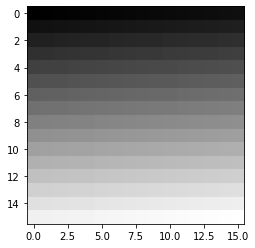

In [18]:
import matplotlib.pyplot as plt
image = np.arange(256).reshape(16,16)
plt.imshow(image, cmap="gray")

#### Example 1. 주어진 이미지(16, 16)에서 위쪽 두 행과 아래 쪽 두 행(row)를 출력하십시오. 
```
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]]
[[224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239]
 [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]]
```

In [19]:
print(image[:2])
print(image[-2:])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]]
[[224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239]
 [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]]


#### Example 2. 주어진 이미지(16, 16)에서 왼쪽 위의 (4, 4)와 오른쪽 아래의 (4, 4) 부분 이미지를 추출하고 이미지로 출력하십시오.  
        ```
                        [[ 0  1  2  3]           [[204 205 206 207]
                         [16 17 18 19]            [220 221 222 223]
                         [32 33 34 35]            [236 237 238 239]
                         [48 49 50 51]]           [252 253 254 255]]
        ```

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-image1.png?raw=true" width="400">

<center>그림 8: 2차원 배열의 추출과 시각화 </center>

#### Solution:

[[ 0  1  2  3]
 [16 17 18 19]
 [32 33 34 35]
 [48 49 50 51]]
[[204 205 206 207]
 [220 221 222 223]
 [236 237 238 239]
 [252 253 254 255]]


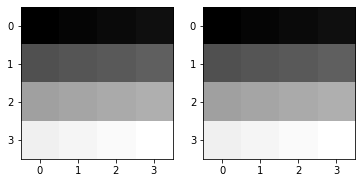

In [27]:
a = image[:4,:4]
b = image[-4:, -4:]
print(a)
print(b)
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(a, cmap="gray");
ax[1].imshow(b, cmap="gray");
plt.show()

#### Your data looks OK, but not the image display? 
- To show a better image, `imshow()` uses the automatic scaling of the colormap, or vmin=min(arr) and vmax=max(arr). 
- Turn off this automatic scaling of the colormap, set `vmin = 0` and `vmax = 255`.

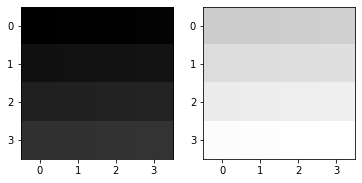

In [28]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(a, cmap="gray", vmin=0, vmax=255);
ax[1].imshow(b, cmap="gray", vmin=0, vmax=255);
plt.show()

## 4. 난수의 배열 생성

파이썬의 numpy.random 모듈에는 난수를 기반으로 난수를 발생하여 배열을 만드는 여러 함수를 제공합니다. 그 중에서 기계학습에서 종종 사용하는 세 개만 소개합니다. 

- `randint(low, high=None, size=None, dtype='l')`
  low 부터 high 미만의 범위에서 정수 표본을 추출하여 지정된 shape으로 배열을 반환
- `normal(loc=0.0, scale=1.0, size=None)` 
  정규 분포 확률 밀도에서 표본을 추출하여 배열로 반환하며, 정규 분포의 평균(loc), 표준편차(scale)을 지정할 수 있음.
- `random(size=None)`
  `[0., 1.)` 범위의 난수를 균등 분포(Uniform Distribution)에서 표본 추출하여 배열로 반환
- `randn()` 표준 정규 분포로부터 샘플링된 난수를 반환, 평균 0, 표준편차 1임. 

In [29]:
a = np.random.randint(-5, 5, size=(2, 4))
print(a)

[[-4  4  0 -3]
 [ 0  3 -4  3]]


In [30]:
mean = 0
std = 1
a = np.random.normal(mean, std, size=(2, 3, 3))
print(a)

[[[ 0.13358693 -1.00048256 -0.78370987]
  [ 2.13526095 -0.24170694 -0.14887612]
  [-1.0896646  -2.13028318  0.58565416]]

 [[ 2.00710952  0.58228789  1.12604116]
  [ 0.34574071 -0.25184969  0.58895554]
  [-0.9041922   0.42011885 -0.67474016]]]


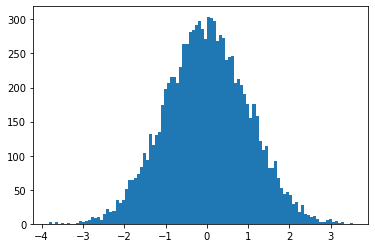

In [31]:
data = np.random.normal(0, 1, 10000)
plt.hist(data, bins=100)
plt.show()

[[0.66137529 0.28628524 0.94540324 0.75019611]
 [0.38807032 0.75945228 0.13515288 0.67090938]]


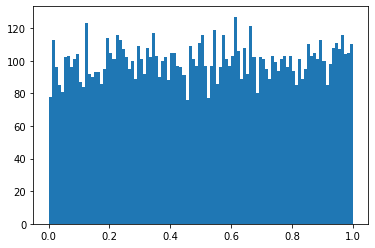

In [32]:
a = np.random.random((2, 4))
print(a)
data = np.random.random(10000)
plt.hist(data, bins=100)
plt.show()

#### 난수 발생에 대한 노트
기계학습에서 난수를 자주 사용합니다. 그런데, 주의할 점이 하나 있습니다. 난수를 발생하는 알고리즘은 특정한 시작 숫자로부터 무작위로 숫자를 만들어 냅니다. 따라서 시작점을 알면 난수 발생을 똑같이 반복할 수 있습니다. 이렇게 난수 발생을 재연하기 위해 난수의 시작점을 지정할 수 있는 함수가 있는데, 그것이 바로 np.random.seed 입니다.
다음 예를 살펴봅시다. 

In [34]:
np.random.seed(100)

In [35]:
np.random.random((2, 2))

array([[0.54340494, 0.27836939],
       [0.42451759, 0.84477613]])

In [36]:
np.random.randint(0, 10, (2, 3))

array([[4, 2, 5],
       [2, 2, 2]])

In [37]:
# 위의 seed값을 다시 설정하여, 아래에서 난수가 재연 가능하도록 함
np.random.seed(100)  

In [38]:
np.random.random((2, 2))

array([[0.54340494, 0.27836939],
       [0.42451759, 0.84477613]])

In [39]:
np.random.randint(0, 10, (2, 3))

array([[4, 2, 5],
       [2, 2, 2]])

기계학습에 특별히 개발할 때는 임의의 seed값을 정하여 난수를 발생할 것을 권장합니다. 왜냐하면, 만약에 디버깅할 경우에 버그가 발생한 상황을 재연할 수 있어야 하기 때문입니다. 

## 5. 자료 쓰기와 읽기 
기계학습의 학습 자료 데이터 셋을 저장할 때 다양한 방식이 있을 수 있겠지만, 간단한 두 가지 방법 중에 중에 하나를 사용합니다. 
- 하나는 행 벡터 방식(디폴트)이고, 또 다른 하나는 열 벡터 방식입니다. 물론 그런 데이터를 읽고 적절히 가공하여 학습에 사용할 수 있어야 합니다. 

- 파일로 저장할 때 사용하는 명령어 `%%writefile` 셀매직(Cell Magic)명령어입니다. `%%`로 시작하는 셀매직 명령어는 항상 셀의 첫줄에 나와야 합니다. 특별히 `%%writefile` 명령어는 셀의 내용을 파일로 저장할 때, 만약 이미 해당 폴더에 같은 이름의 파일이 존재할지라도 아무런 경고없이 덮어쓰기를 하니까 유의해야 합니다. 

- 기계학습 자료를 파일에 저장하거나 읽는 함수 라이브러리로 pandas를 많이 사용하지만, 간단한 자료는 넘파이의 `loadtxt()`, `genfromtxt()`, `savetxt()` 함수도 자주 사용합니다. 는 것도 좋습니다.  


#### loadtxt() - Load data from a text file.
```
numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
```

#### genfromtxt() - Load data from a text file, with missing values handled as specified
```
numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')[source]¶
```

#### savetxt() - Save an array to a text file
```
numpy.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='n', header='', footer='', comments='# ', encoding=None)
```

### 자료 쓰기
다음은 행$^{row}$ 벡터 방식으로 즉 보이는 형식 그대로 데이터를 저장합니다. 

In [42]:
%%writefile ./data/joyxor.txt
# writing a data file
# xor data with bias X0 - row vector style
# x0 x1 x2 y
1 0 0 0
1 0 1 1
1 1 0 1
1 1 1 0

Writing ./data/joyxor.txt


In [43]:
# read and display a file  
!cat  ./data/joyxor.txt

# writing a data file
# xor data with bias X0 - row vector style
# x0 x1 x2 y
1 0 0 0
1 0 1 1
1 1 0 1
1 1 1 0


### 자료 읽기

기계학습 자료가 헤더 행을 포함하지 않고 공백으로 구분된 숫자들로 구성되어 있다면 `loadtxt()` 함수를 사용하여 txt 파일이나 csv 파일로부터 넘파이 배열로 쉽게 읽어와 사용할 수 있습니다. 다음과 같은 편리한 옵션도 있습니다.

- `unpack` 옵션을 사용하여 row vector를 column vector로 변환(전치)할 수 있습니다.
- `dtype` 옵션을 이용하여 읽어오는 자료형 정할 수 있습니다. 
- `delimit` 옵션을 자료들을 구분할 수 있으며, 디폴트는 '공백'입니다. 

In [44]:
import numpy as np
data = np.loadtxt('./data/joyxor.txt', dtype=int)
print(data)

[[1 0 0 0]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


#### Example 1: 위에 읽은 XOR 데이터에서 입력 x(4, 3)과 출력 y(4, 1)형상으로 Slicing하십시오. 
```
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]
```

In [47]:
x, y = data[:,:-1], data[:,-1:]
print(x)
print(y)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


## Exercise 

### 1. 배열 생성과 axis를 이용한 연산 

다음 그림과 같은 3차원 배열 `a`를 생성하고, axis = 0 및 axis = 1 의 sum을 각각 손으로 계산하고, 또한 코드로 확인하십시오.  

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray2.png?raw=true" width="600">

<center>그림 1: 넘파이 1차원, 2차원 및 3차원 배열과 Axis 0 의미의 변화</center>

1차원 배열에 있는 유일한 축 즉 첫 번째 축이 axix 0 입니다. 2차원 배열에서 axis 0는 행(row)의 갯수입니다.  2차원 배열이 여러 개 모여 3차원의 배열을 이루는데, 그 첫 번째 axis는 2차원 배열의 갯수입니다. 배열 shape의 첫 번째 요소가 항상 axis 0에 해당합니다. 

여기서 생성한 3차원 배열 `a`는 (2, 3) 2차원 배열이 4개 모인 것이며, shape은 (4, 2, 3)이 될 것입니다.  크기가 (2, 3)인 4개의 배열들의 원소들을 각각 더하면 될 것입니다. 우선 그러한 배열을 생성하여 출력하고, 우리가 머리로 먼저 계산하고, 이것을 코딩하여 확인합니다.  이제 크기가 (2, 3)인 4개의 배열들의 원소들을 각각 더하면, 결과를 내면 그 형상은 당연히 (2, 3)가 될 것입니다.  

```
[[36 40 44]
 [48 52 56]]]

[[ 3  5  7]
 [15 17 19]
 [27 29 31]
 [39 41 43]]
```
#### Solution:

In [22]:
a = np.arange(24).reshape(4,2,3)
axis0sum = np.sum(a, axis=0)
axis1sum = np.sum(a, axis=1)
print(axis0sum)
print(axis1sum)

[[36 40 44]
 [48 52 56]]
[[ 3  5  7]
 [15 17 19]
 [27 29 31]
 [39 41 43]]


예를 들면, 어떤 배열의 크기(shape)가 (60000, 28, 28)이라고 한다면, 배열의 크기가 (28, 28)인 2차원 배열이 6만개 있다는 것입니다. 2차원 배열은 흔히 이미지를 나타내는 많이 사용됩니다. 좀 더 구체적으로 말하면, 채널이 하나인 흑백 이미지가 6만 장이라는 말입니다. 

### 2. 이미지 추출하기 - Center

기계학습을 진행하다 보면, 이미지를 일부분을 추출(Slicing)해야 할 때가 종종 있습니다. 주어진 이미지(16, 16)에서 처음과 마지막 두 행과 열을 제외한 부분 이미지(8x8)를 추출하십시오
- 추출한 이미지의 four corners의 값을 출력하여, 각각 `68, 75, 180, 187`인 것을 확인하십시오.  

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-image2.png?raw=true" width="200">

<center>그림 2: 이미지의 가운데 부분 추출하기</center>

#### Solution:

68 75 180 187


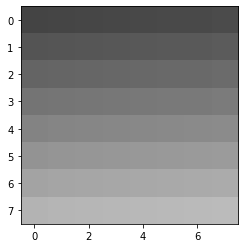

In [28]:
import matplotlib.pyplot as plt
image = np.arange(256).reshape(16, 16)
center = image[4:-4,4:-4]
print(center[0,0], center[0,-1], center[-1,0], center[-1,-1])
plt.imshow(center, cmap="gray", vmin=0, vmax=255)

### 3. 이미지 추출하여 결합하기 - Four corners

기계학습을 진행하다 보면, 이미지를 일부분을 추출(Slicing)해야 할 때가 종종 있습니다. 주어진 이미지(16, 16)에서 네 코너들(upper lower 를 4x4로 추출한 후, 이들을 결합한 새로운 이미지(8x8)를 만드십시오. 
- 결합한 이미지의 four corners의 값을 출력하여, 각각 `0, 15, 240, 255`인 것을 확인하십시오.  

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-image3.png?raw=true" width="200">

<center>그림 3: 이미지의 네 코너들을 4x4로 추출하여 결합하기</center>

#### Solution:

[[  0   1   2   3  12  13  14  15]
 [ 16  17  18  19  28  29  30  31]
 [ 32  33  34  35  44  45  46  47]
 [ 48  49  50  51  60  61  62  63]
 [192 193 194 195 204 205 206 207]
 [208 209 210 211 220 221 222 223]
 [224 225 226 227 236 237 238 239]
 [240 241 242 243 252 253 254 255]]


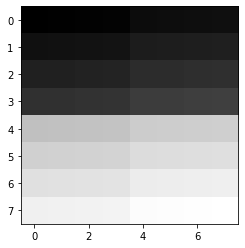

In [43]:
image = np.arange(256).reshape(16, 16)
upperleft = image[:4,:4]
lowerleft = image[-4:,:4]
upper = np.vstack([upperleft, lowerleft])  # combine two upper corners
upperright = image[:4, -4:]
lowerright = image[-4:, -4:]
lower = np.vstack([upperright, lowerright])      # combine two lower corners
corners = np.hstack([upper, lower])            # combine upper and lower 
print(corners)
plt.imshow(corners, cmap="gray")

### 4. 이미지 이동하기 (Shift)

기계학습을 진행하다 보면, 이미지를 아래로, 오른쪽으로 혹은 위로, 왼쪽 이동해야 할 때가 있습니다. 이를 위해 ndarray처럼 ndimage 라이브러리가 제공됩니다. 수많은 함수 중에 이미지를 이동할 수 있는 shift함수가 있으며, 이동한 빈 자리에 어떤 값으로 채울지에 여러 옵션도 있습니다. 

shfit함수의 두 번째 인자가 __shift__인데, 이것을 정확히 설정하는 것이 중요합니다. 이 함수는 축에 따라 이미지를 shift하는데, 2D텐서(2차원 배열, 이미지)에서 axis 0는 위에 아래 방향이고, axis 1은 왼쪽에서 오른쪽 방향입니다. 넘파이 2차원 배열과 일치합니다.

[scipy.ndimage.interpolation.shift](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html) 를 검색해서 살펴 보십시오. 

```
scipy.ndimage.interpolation.shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
```
- input : ndarray - The input array.
- shift : float or sequence, optional, 

<p style="color:blue">The shift along the axes. If a float, shift is the same for each axis. If a sequence, shift should contain one value for each axis. </p>

위와 같은 설명에 따라 두 번째 shift 매개변수를 axis에 따라 어떻게 이동할지 설정해야 합니다. 이를 참고로 하여 아래 이미지(original)를 상/하, 좌우로 3 픽셀을 옮기고, 그 빈 자리에는 100으로 채우도록 코딩하십시오. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/midterm14.png?raw=true" width="600">

<center>그림 4: 이미지 이동하기</center>

#### Solution:

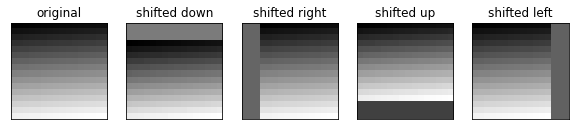

In [42]:
from scipy.ndimage.interpolation import shift

shifted_down = shift(image, [3, 0], cval=100)  
shifted_right = shift(image, [0, 3], cval=100)  
shifted_up = shift(image, [-3, 0], cval=100)  
shifted_left = shift(image, [0, -3], cval=100)  

fig, ax = plt.subplots(1, 5, figsize=(10,10))  
ax[0].imshow(image, cmap = "gray")
ax[1].imshow(shifted_down, cmap="gray")
ax[2].imshow(shifted_right, cmap="gray")
ax[3].imshow(shifted_up, cmap="gray")
ax[4].imshow(shifted_left, cmap="gray")

ax[0].set_title("original")
ax[1].set_title("shifted down")
ax[2].set_title("shifted right")
ax[3].set_title("shifted up")
ax[4].set_title("shifted left")

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()

## 학습 정리

- 넘파이를 사용하는 이유 
- 넘파이 개념과 사용법 
    - 브로드캐스팅
    - 배열의 축 다루기
    - 난수 배열


### 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/)
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)